In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Loading and Overview

In [2]:
## reading CSV file
df = pd.read_csv('AmesHousing.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
## printing summary of dataset
print(df.shape)
print(df.dtypes)


(2930, 82)
Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


In [4]:
## Checking missing values
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
## Filter to show only the counts of True values
    value_counts = missing_data[column].value_counts()
    if True in value_counts.index:
        print(column)
        print(value_counts)
        print(" ")

Lot Frontage
Lot Frontage
False    2440
True      490
Name: count, dtype: int64
 
Alley
Alley
True     2732
False     198
Name: count, dtype: int64
 
Mas Vnr Type
Mas Vnr Type
True     1775
False    1155
Name: count, dtype: int64
 
Mas Vnr Area
Mas Vnr Area
False    2907
True       23
Name: count, dtype: int64
 
Bsmt Qual
Bsmt Qual
False    2850
True       80
Name: count, dtype: int64
 
Bsmt Cond
Bsmt Cond
False    2850
True       80
Name: count, dtype: int64
 
Bsmt Exposure
Bsmt Exposure
False    2847
True       83
Name: count, dtype: int64
 
BsmtFin Type 1
BsmtFin Type 1
False    2850
True       80
Name: count, dtype: int64
 
BsmtFin SF 1
BsmtFin SF 1
False    2929
True        1
Name: count, dtype: int64
 
BsmtFin Type 2
BsmtFin Type 2
False    2849
True       81
Name: count, dtype: int64
 
BsmtFin SF 2
BsmtFin SF 2
False    2929
True        1
Name: count, dtype: int64
 
Bsmt Unf SF
Bsmt Unf SF
False    2929
True        1
Name: count, dtype: int64
 
Total Bsmt SF
Total Bsmt SF
False 

## Step 2: Data Cleaning

In [5]:
# Check for missing values
missing_data = df.isnull()

# Iterate through columns with missing values
for column in missing_data.columns:
    if missing_data[column].any():  # Only process columns with missing values
        # Check the data type of the column
        if pd.api.types.is_integer_dtype(df[column]):
           
            # Replace NaN values and newly converted float values with the column mean
            df[column].fillna(df[column].mean(), inplace=True)
        elif pd.api.types.is_float_dtype(df[column]):
            # Replace NaN values with the column mean
            df[column].fillna(df[column].mean(), inplace=True)
        elif pd.api.types.is_object_dtype(df[column]):
            # Replace NaN values in object columns with 'Unknown'
            df[column].fillna('Unknown', inplace=True)

# Verify the changes
print(df.info())  # Check updated data types
print(df.columns[df.isnull().any()].tolist()) # Confirm no missing values
print("\nMissing Values Count:\n", df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

C:\Users\hanli\AppData\Local\Temp\ipykernel_23488\1986915938.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\hanli\AppData\Local\Temp\ipykernel_23488\1986915938.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
## Checking duplicates
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

## Step 3: Descriptive Statistics

In [7]:
## Summary statistics for numerical columns
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2930.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     21.321523    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     60.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     69.224590    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     78.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2930.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [8]:
## Range of SalePrice

min_saleprice = df['SalePrice'].min()
max_saleprice = df['SalePrice'].max()
range_saleprice = max_saleprice - min_saleprice
print("Range of Sale Price: " + str(range_saleprice))

Range of Sale Price: 742211


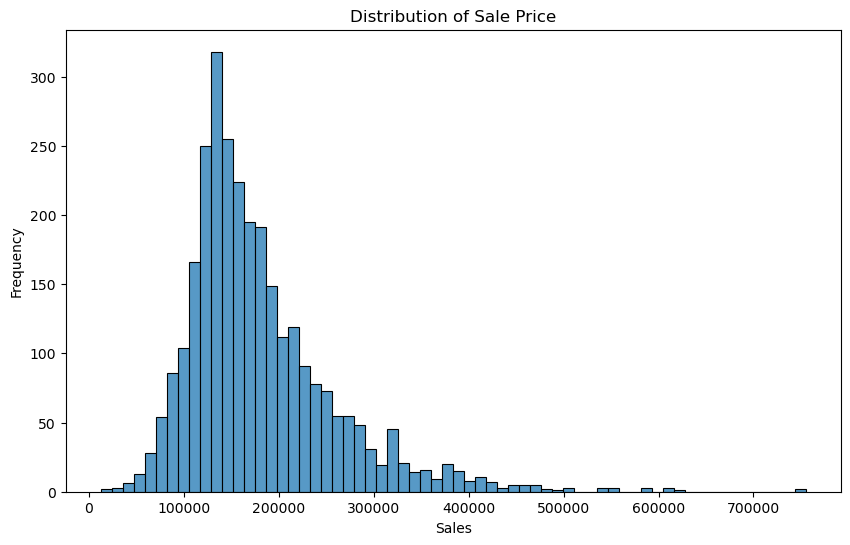

In [9]:
## Showing Distribution with Histogram

plt.figure(figsize = (10,6))
sns.histplot(df['SalePrice'],edgecolor = 'black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

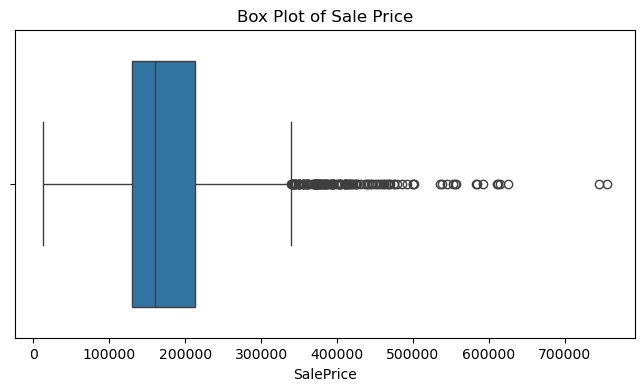

In [10]:
## Showing with BoxPlot

plt.figure(figsize = (8,4))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of Sale Price')
plt.savefig('Box Plot of Sale Price.png')
plt.show()

# Observations on Sale Price

## Distribution
- The distribution of `SalePrice` is **heavily skewed to the right.**  
  This means there are a significant number of properties with lower `SalePrices` and a smaller number with very high `SalePrices.`

## Median
- The median `SalePrice` appears to be around **$200,000.**  
  This indicates that half of the properties sold for less than $200,000, and half sold for more.

## Interquartile Range (IQR)
- The IQR, represented by the box's width, reflects the middle 50% of the data.  
  In this case, the IQR seems to be fairly narrow, suggesting that the middle 50% of properties have relatively similar `SalePrices.`

## Whiskers
- The whiskers extend from the box to the minimum and maximum values within a certain range.  
  Here, the whiskers are relatively short, indicating that most of the data falls within a relatively narrow range.

## Outliers
- Several outliers are visible as individual dots beyond the whiskers.  
  These represent properties with `SalePrices` significantly higher than the majority of the data.

---

# Insights

## Price Range
- The box plot suggests that most properties in this dataset fall within a price range of around **$100,000 to $300,000.**

## High-End Properties
- There is a presence of high-end properties with `SalePrices` exceeding **$500,000.**

## Skewness
- The **right-skewed distribution** indicates that there are more properties with lower `SalePrices` compared to higher ones.

---


In [11]:
# Computing summary statistics
print(df['SalePrice'].describe())
print(" ")
print(df['Lot Area'].describe())
print(" ")
print(df['Year Built'].describe())
print(" ")
print(df['Overall Qual'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
 
count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64
 
count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64
 
count    2930.000000
mean        6.094881
std         1.411026
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64


In [12]:
# Examining the desired columns if their names are not fully known
lot_columns = [col for col in df.columns if col.startswith('Sale')]
print(lot_columns)

['Sale Type', 'Sale Condition', 'SalePrice']


## Step 4: Univariate Analysis

In [13]:
# Creating desired numerical columns to analyze

desired_numeric_columns = df[['SalePrice','Lot Area', 'Gr Liv Area']]
len(desired_numeric_columns.columns)

3

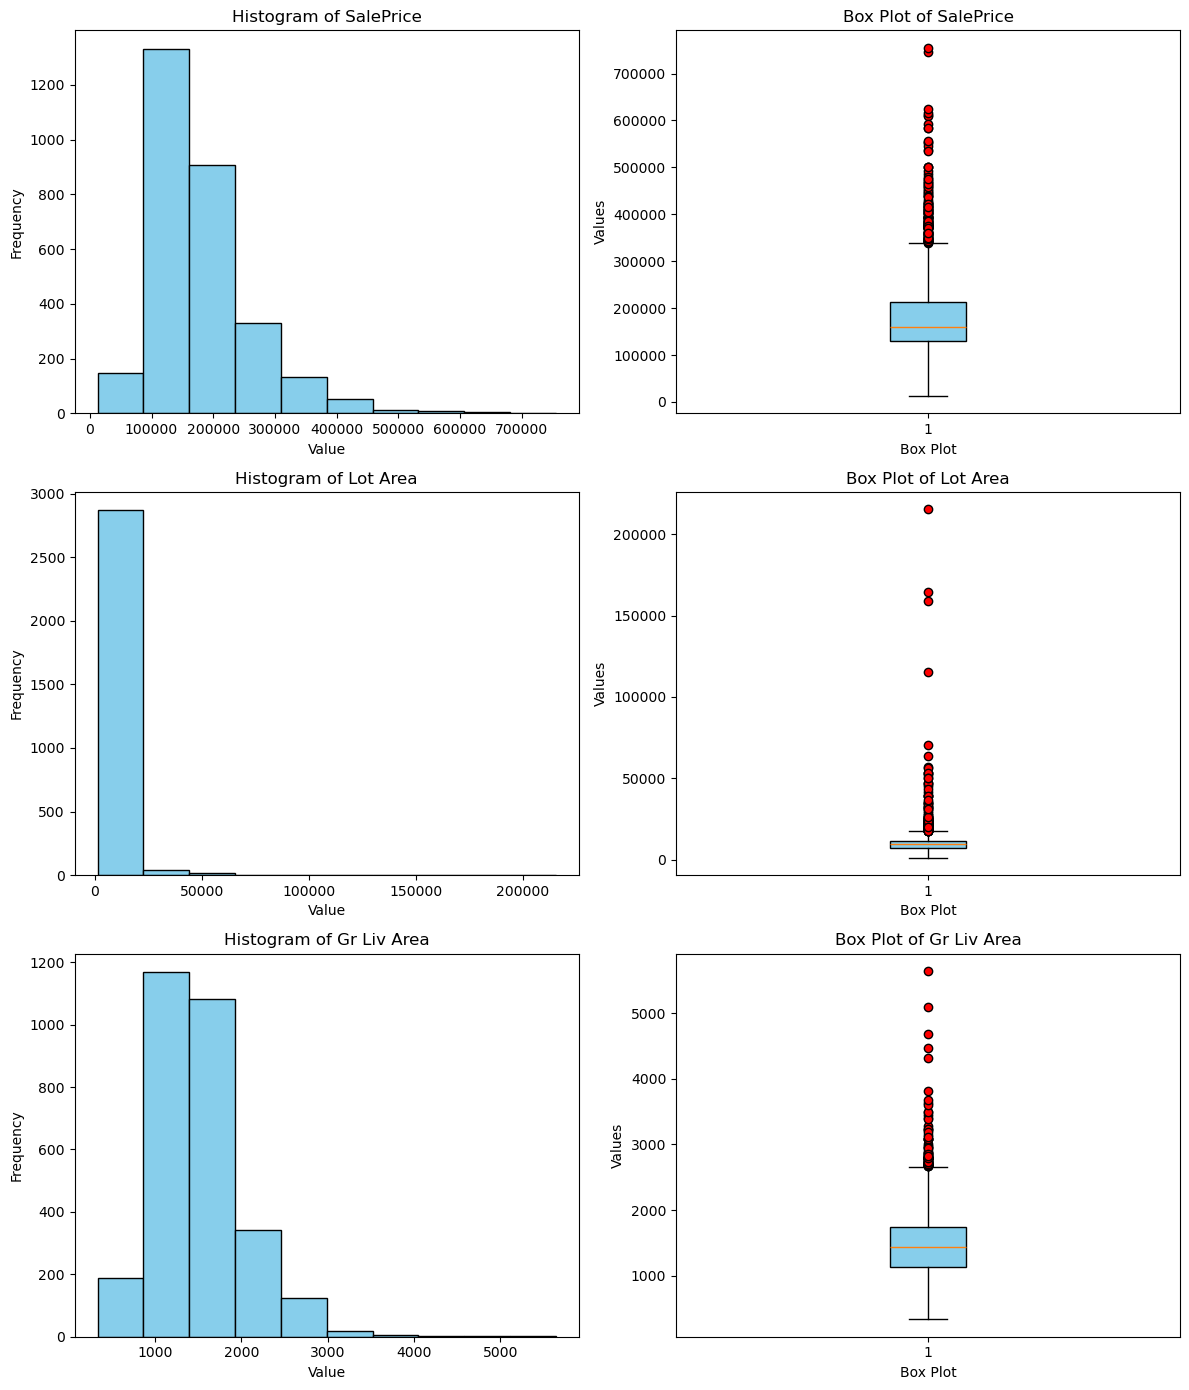

In [14]:

# Define the number of rows and columns
num_cols = 2  # Two columns: one for histograms, one for boxplots
num_rows = len(desired_numeric_columns.columns)  # One row for each column

# Create subplots with 2 columns and rows based on the number of desired columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 14), sharey=False)

# Flatten the axes array in case there are multiple rows
axes = axes.flatten()

# Plot histograms and boxplots for each numeric column
for i, column in enumerate(desired_numeric_columns):
    # Plot Histogram in the first column (0, 2, 4,...)
    axes[2*i].hist(df[column], bins=10, color='skyblue', edgecolor='black')
    axes[2*i].set_title(f"Histogram of {column}")
    axes[2*i].set_xlabel("Value")
    axes[2*i].set_ylabel("Frequency")

    # Plot Boxplot in the second column (1, 3, 5,...)
    axes[2*i + 1].boxplot(df[column], patch_artist=True, 
                           boxprops=dict(facecolor='skyblue', color='black'),
                           whiskerprops=dict(color='black'), 
                           flierprops=dict(markerfacecolor='red', marker='o'))
    axes[2*i + 1].set_title(f"Box Plot of {column}")
    axes[2*i + 1].set_xlabel("Box Plot")
    axes[2*i + 1].set_ylabel("Values")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


---

## Overall Observations:

### Skewness:
All three histograms exhibit a right-skewed distribution. This means that the majority of the data points are concentrated towards the lower end of the value range, with a few outliers extending towards the higher end.

## Individual Histograms:

### Histogram of SalePrice:
- The distribution is heavily skewed to the right.
- The majority of houses have a sale price below 200,000.
- There are a few outliers with sale prices exceeding 600,000.

### Histogram of Lot Area:
- The distribution is also skewed to the right.
- Most houses have a lot area below 50,000 square feet.
- There are a few outliers with lot areas exceeding 200,000 square feet.

### Histogram of Gr Liv Area:
- The distribution is skewed to the right.
- The majority of houses have a living area below 2,000 square feet.
- There are a few outliers with living areas exceeding 4,000 square feet.

---


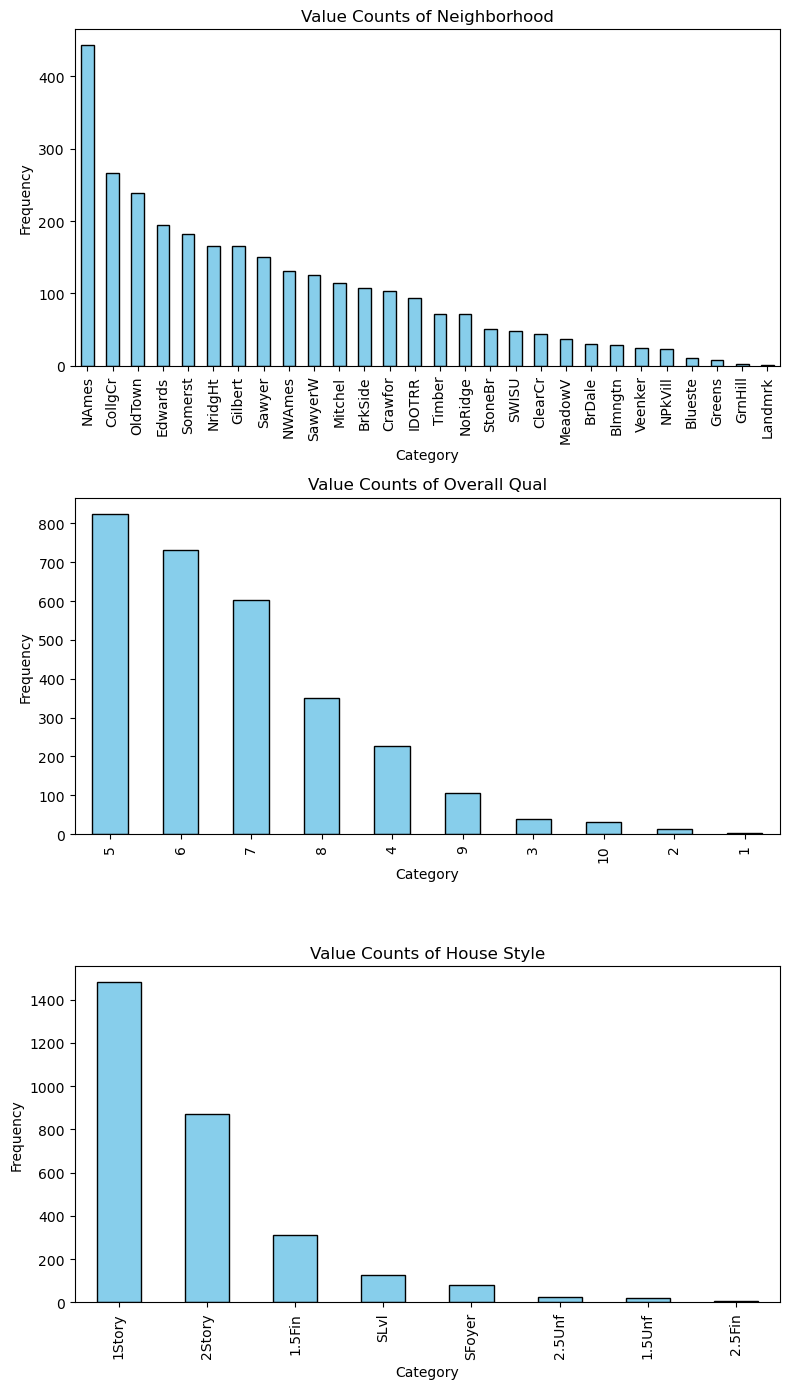

In [15]:
desired_categorical_columns = df[['Neighborhood','Overall Qual','House Style']]

# Create rows and columns for subplot
num_columns = 1
num_rows = len(desired_categorical_columns.columns)

# Create subplots with 2 rows and adjusted columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(8, 14), sharey=False)

# Flatten the axes array in case there are multiple rows
axes = axes.flatten()

# Plot bar charts for each categorical column's value counts
for i, column in enumerate(desired_categorical_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Value Counts of {column}")
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Frequency")

# Hide any empty subplots if the number of columns isn't a perfect multiple of 2
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.savefig('Value Counts.png')
plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Observations on Value Counts

## 1. Value Counts of Neighborhood

### Most Frequent Neighborhoods
- The chart shows that **"CollgCr"** is the most frequent neighborhood, followed by **"OldTown"** and **"Edwards."**

### Least Frequent Neighborhoods
- **"GrnHill"** and **"Landmrk"** appear to be the least frequent neighborhoods.

### Distribution
- The distribution is skewed towards certain neighborhoods, with a few being significantly more common than others.

---

## 2. Value Counts of Overall Quality

### Most Frequent Quality
- The highest bar corresponds to a quality level of **"5,"** indicating that this is the most common overall quality rating.

### Least Frequent Quality
- The lowest bar is for quality level **"1,"** suggesting that properties with the lowest quality are less common.

### Distribution
- The distribution appears to be **right-skewed,** with most of the ratings concentrated around **5, 6, and 7.**

---

## 3. Value Counts of House Style

### Most Frequent Style
- **"1Story"** is the most common house style, with a significantly higher frequency than the others.

### Least Frequent Style
- **"2.5Unf"** and **"1.5Unf"** appear to be the least common styles.

### Distribution
- The distribution is heavily skewed towards **"1Story,"** with the other styles having much lower frequencies.

---

# Overall Observations

### Neighborhood Variation
- There is significant variation in the frequency of different neighborhoods, suggesting that some areas are more densely populated than others.

### Quality Distribution
- The overall quality of properties seems to be skewed towards higher ratings, which could indicate a generally good condition of the properties in the dataset.

### Dominant House Style
- **"1Story"** is the most common house style, suggesting that this is a popular architectural choice in the area.


## Step 5: Bivariate Analysis

(0.0, 5907.4)

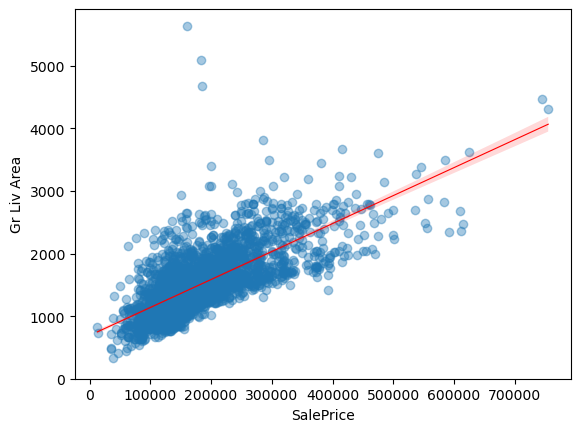

In [16]:
sns.regplot(x='SalePrice',y='Gr Liv Area',data = df, scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.ylim(0,)

(0.0, 15.230156481189075)

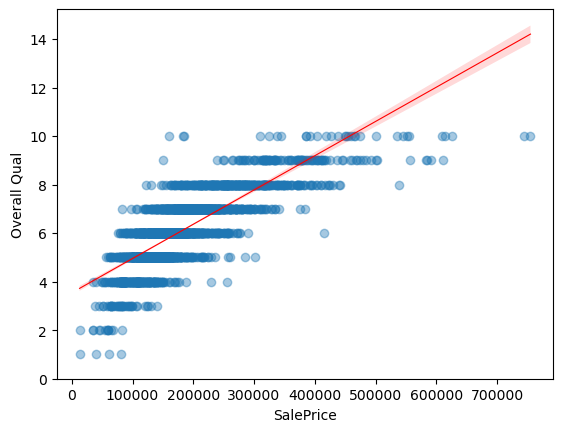

In [17]:
sns.regplot(x='SalePrice',y='Overall Qual',data = df,scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.ylim(0,)

(0.0, 2113.123353223634)

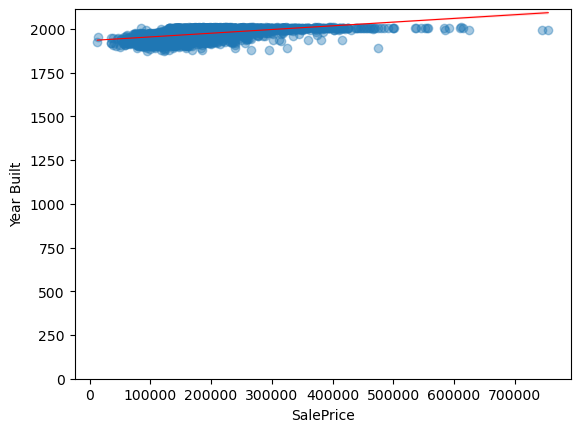

In [18]:
sns.regplot(x='SalePrice',y='Year Built',data = df,scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.ylim(0,)

C:\Anaconda\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


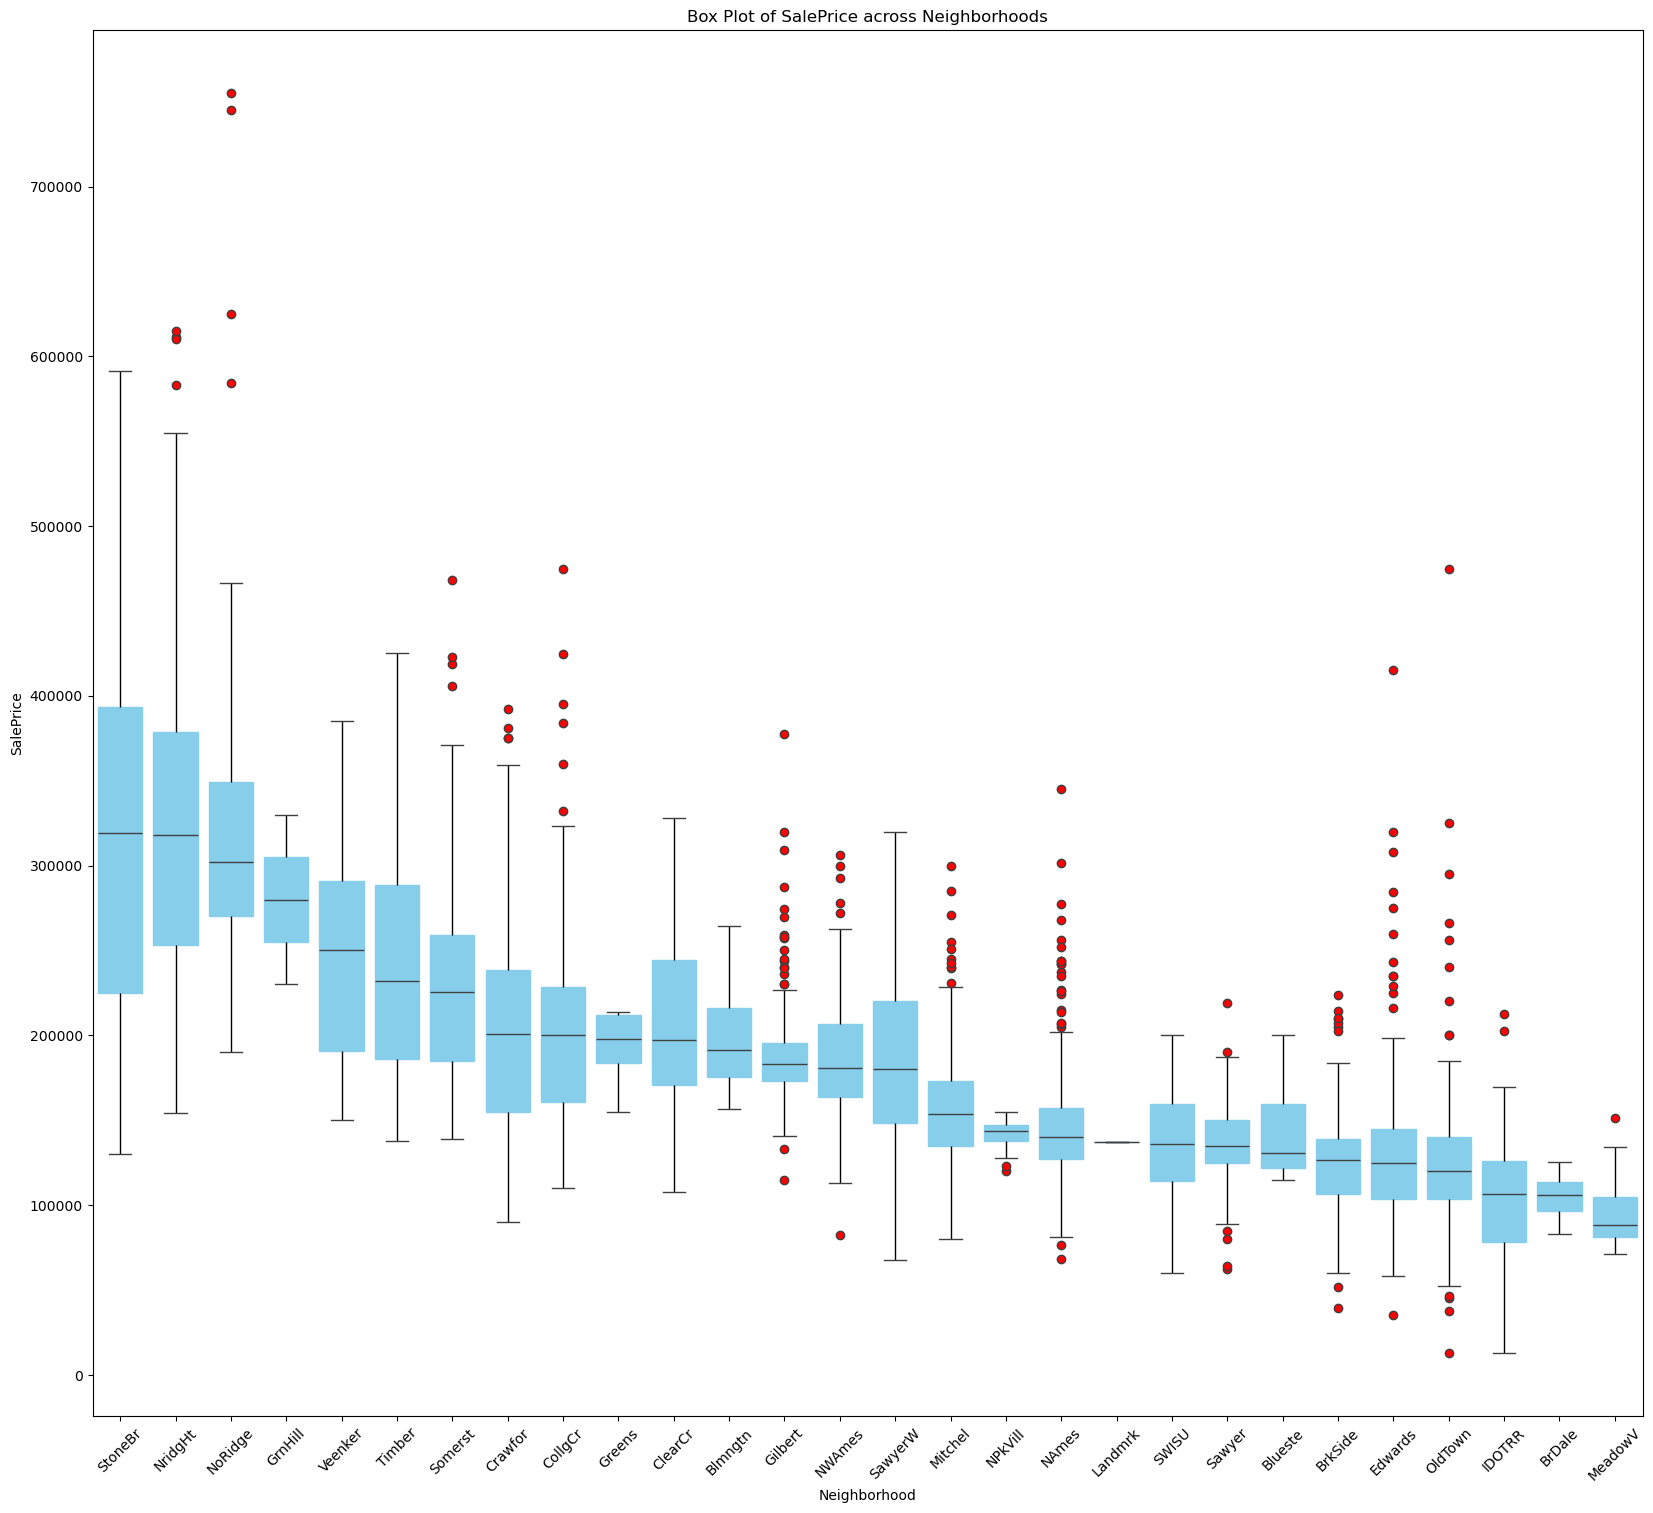

C:\Anaconda\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


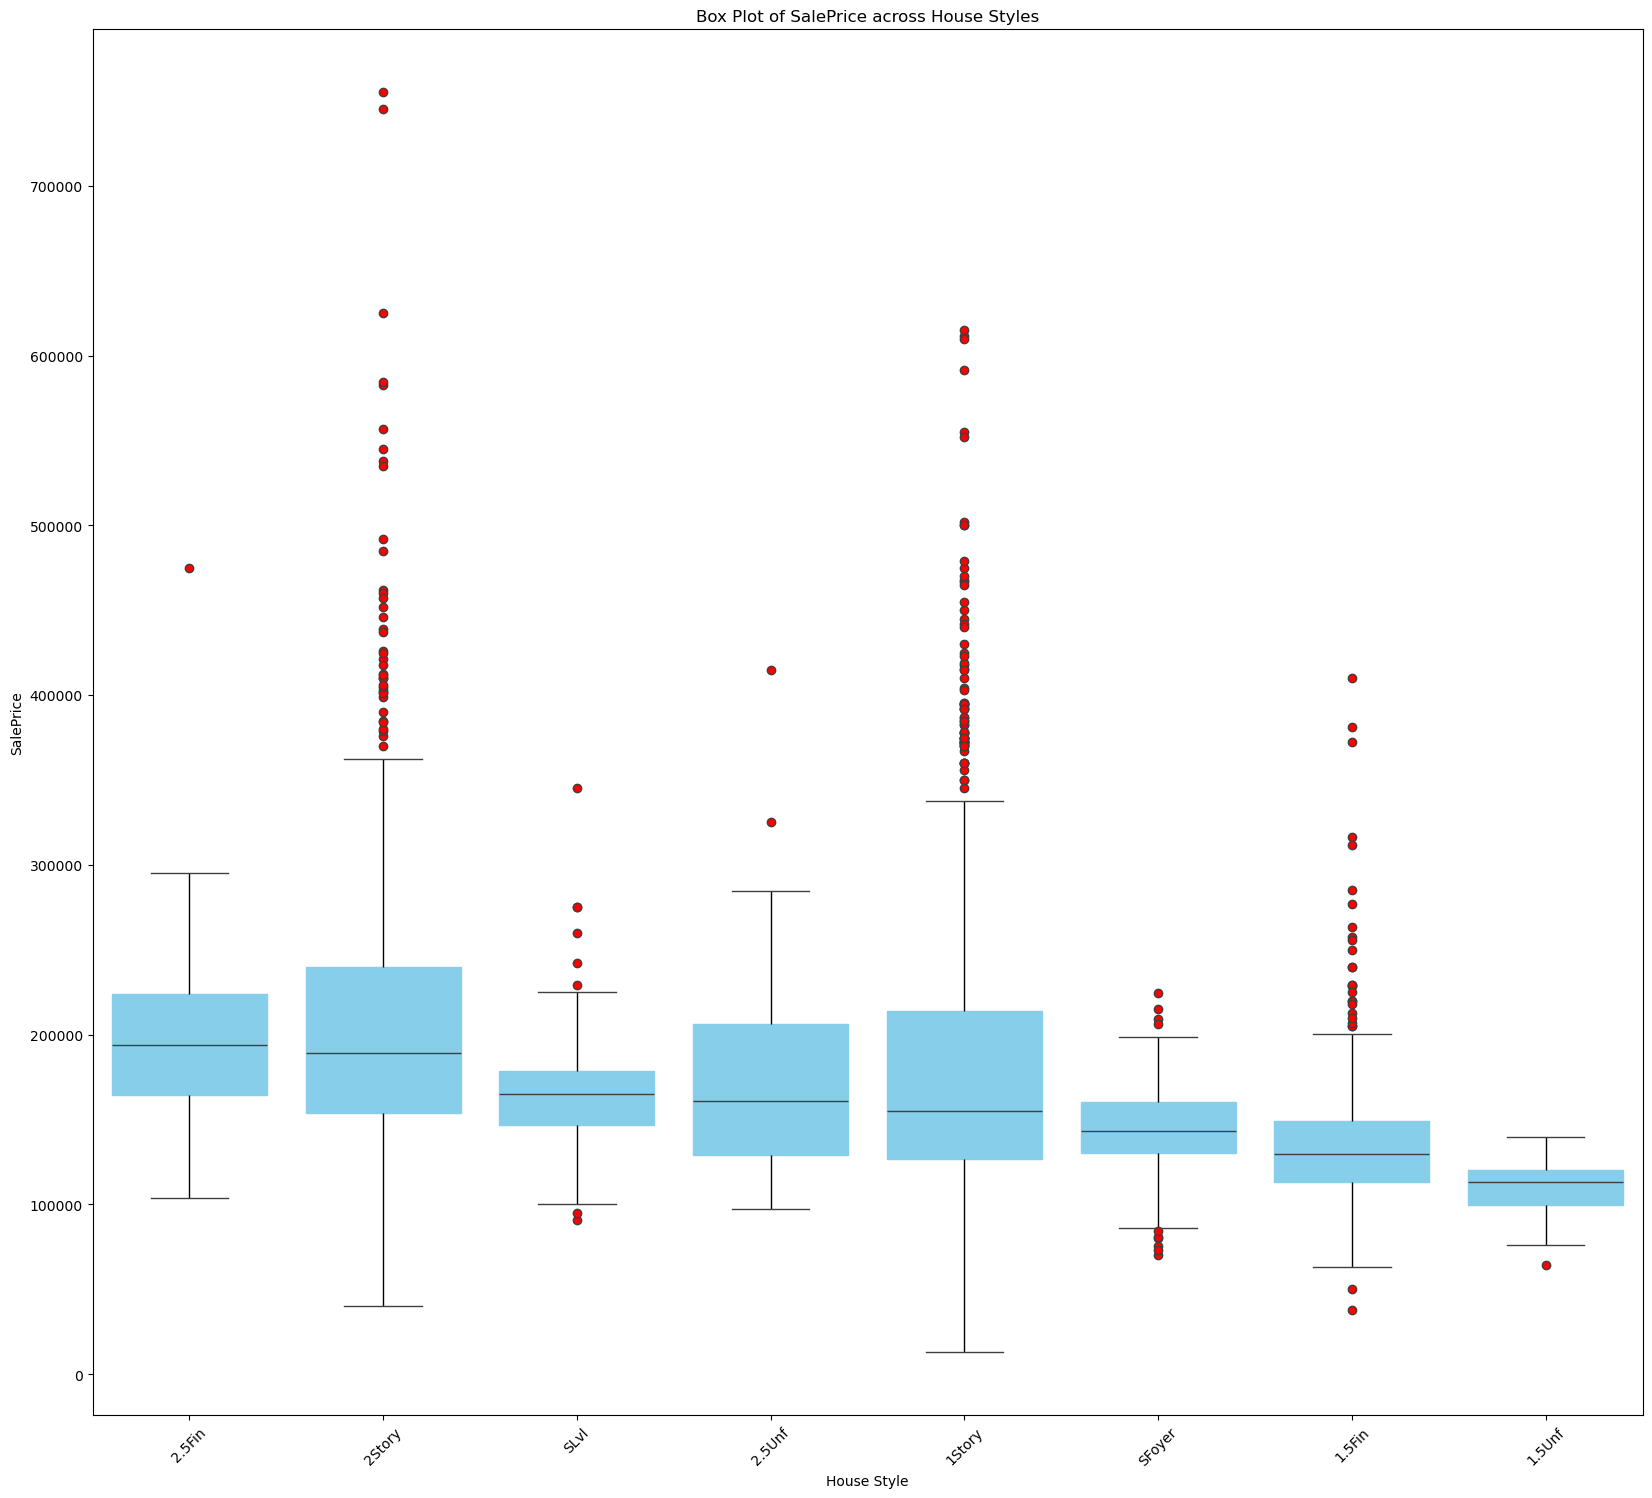

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reorder Neighborhoods by median SalePrice in descending order
neighborhood_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index
df['Neighborhood'] = pd.Categorical(df['Neighborhood'], categories=neighborhood_order, ordered=True)

# Box plot for SalePrice across Neighborhood
plt.figure(figsize=(20, 18))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='skyblue'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of SalePrice across Neighborhoods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig('Box Plot of SalePrice across Neighborhoods.png')
plt.show()

# Reorder House Styles by median SalePrice in descending order
house_style_order = df.groupby('House Style')['SalePrice'].median().sort_values(ascending=False).index
df['House Style'] = pd.Categorical(df['House Style'], categories=house_style_order, ordered=True)

# Box plot for SalePrice across HouseStyle
plt.figure(figsize=(20, 18))
sns.boxplot(x='House Style', y='SalePrice', data=df, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='skyblue'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Box Plot of SalePrice across House Styles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig('Box Plot of SalePrice across House Styles.png')
plt.show()


# Overall Observations

### The first box plot shows the distribution of `SalePrice` which varies significantly across the different neighborhoods. Some neighborhoods have a wider range of prices (e.g., `StoneBr`, `NridgHt`), while others have a more concentrated range (e.g., `Blueste`, `BrkSide`).

### Median Values
The median `SalePrice` differs considerably between neighborhoods. Some neighborhoods have a high median (e.g., `StoneBr`, `NridgHt`), indicating that a majority of houses in those areas are expensive. Conversely, other neighborhoods have a low median (e.g., `Blueste`, `BrkSide`), suggesting that most houses there are more affordable.

### Outliers
Several neighborhoods have outliers, represented by the individual red dots above the whiskers. These outliers indicate properties with `SalePrices` that are significantly higher than the typical range for their neighborhood.

### Neighborhood-Specific Analysis

### High-End Neighborhoods
- **StoneBr**, **NridgHt**, **NoRidge**:  
  These neighborhoods consistently have the highest median `SalePrices` and a wide range of prices, suggesting they are home to luxury properties.

### Mid-Range Neighborhoods
- Many neighborhoods fall into this category, with median `SalePrices` ranging from around $150,000 to $250,000.  
  These neighborhoods offer a mix of property types and price points.

### Affordable Neighborhoods
- **Blueste**, **BrkSide**, **OldTown**:  
  These neighborhoods have lower median `SalePrices` and a narrower range, suggesting they are more affordable options.

---


### The second box plot visualizes the distribution of `SalePrice` for different house styles.

### Observations:

- **Median Sale Price**: The median sale price (represented by the horizontal line within each box) varies across house styles. Some styles, like "2Story" and "1Story", tend to have higher median sale prices compared to others like "SLvl" and "SFoyer".

- **Interquartile Range (IQR)**: The IQR (represented by the box height) indicates the spread of the middle 50% of the data. Styles like "2Story" and "1Story" show a wider IQR, suggesting a greater variability in sale prices within those categories.

- **Outliers**: The dots above and below the whiskers represent outliers, which are data points that fall significantly outside the expected range. There are a few outliers in several house styles, indicating some houses with unusually high or low sale prices compared to others in their category.

- **Overall Distribution**: The box plots reveal that the distribution of sale prices is skewed to the right for most house styles. This means that there are more houses with lower sale prices within each category, with a few outliers at the higher end.

---

## Step 6: Feature Relationships and Correlations

In [20]:
## Creating numerical columns

numeric_columns = df.select_dtypes(include=["int", "float"]).columns
numeric_columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [21]:
numeric_df = df[numeric_columns]
numeric_df.corr() # Computing correlation across numerical columns

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.006461,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030818,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.088419,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.228392,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002724,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.006461,-0.088419,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.203383,...,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921,0.340751
Lot Area,0.031354,0.034868,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126586,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.198900,0.097188,1.000000,-0.094812,0.597027,0.569609,0.427470,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.067383,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135088,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.115688,0.023258,0.597027,-0.368773,1.000000,0.612095,0.311828,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.085744,0.021682,0.569609,0.047680,0.612095,1.000000,0.196170,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030818,-0.228392,0.002724,0.203383,0.126586,0.427470,-0.135088,0.311828,0.196170,1.000000,...,0.165108,0.142766,-0.110447,0.013778,0.065622,0.004617,0.044932,-0.000275,-0.017665,0.505784


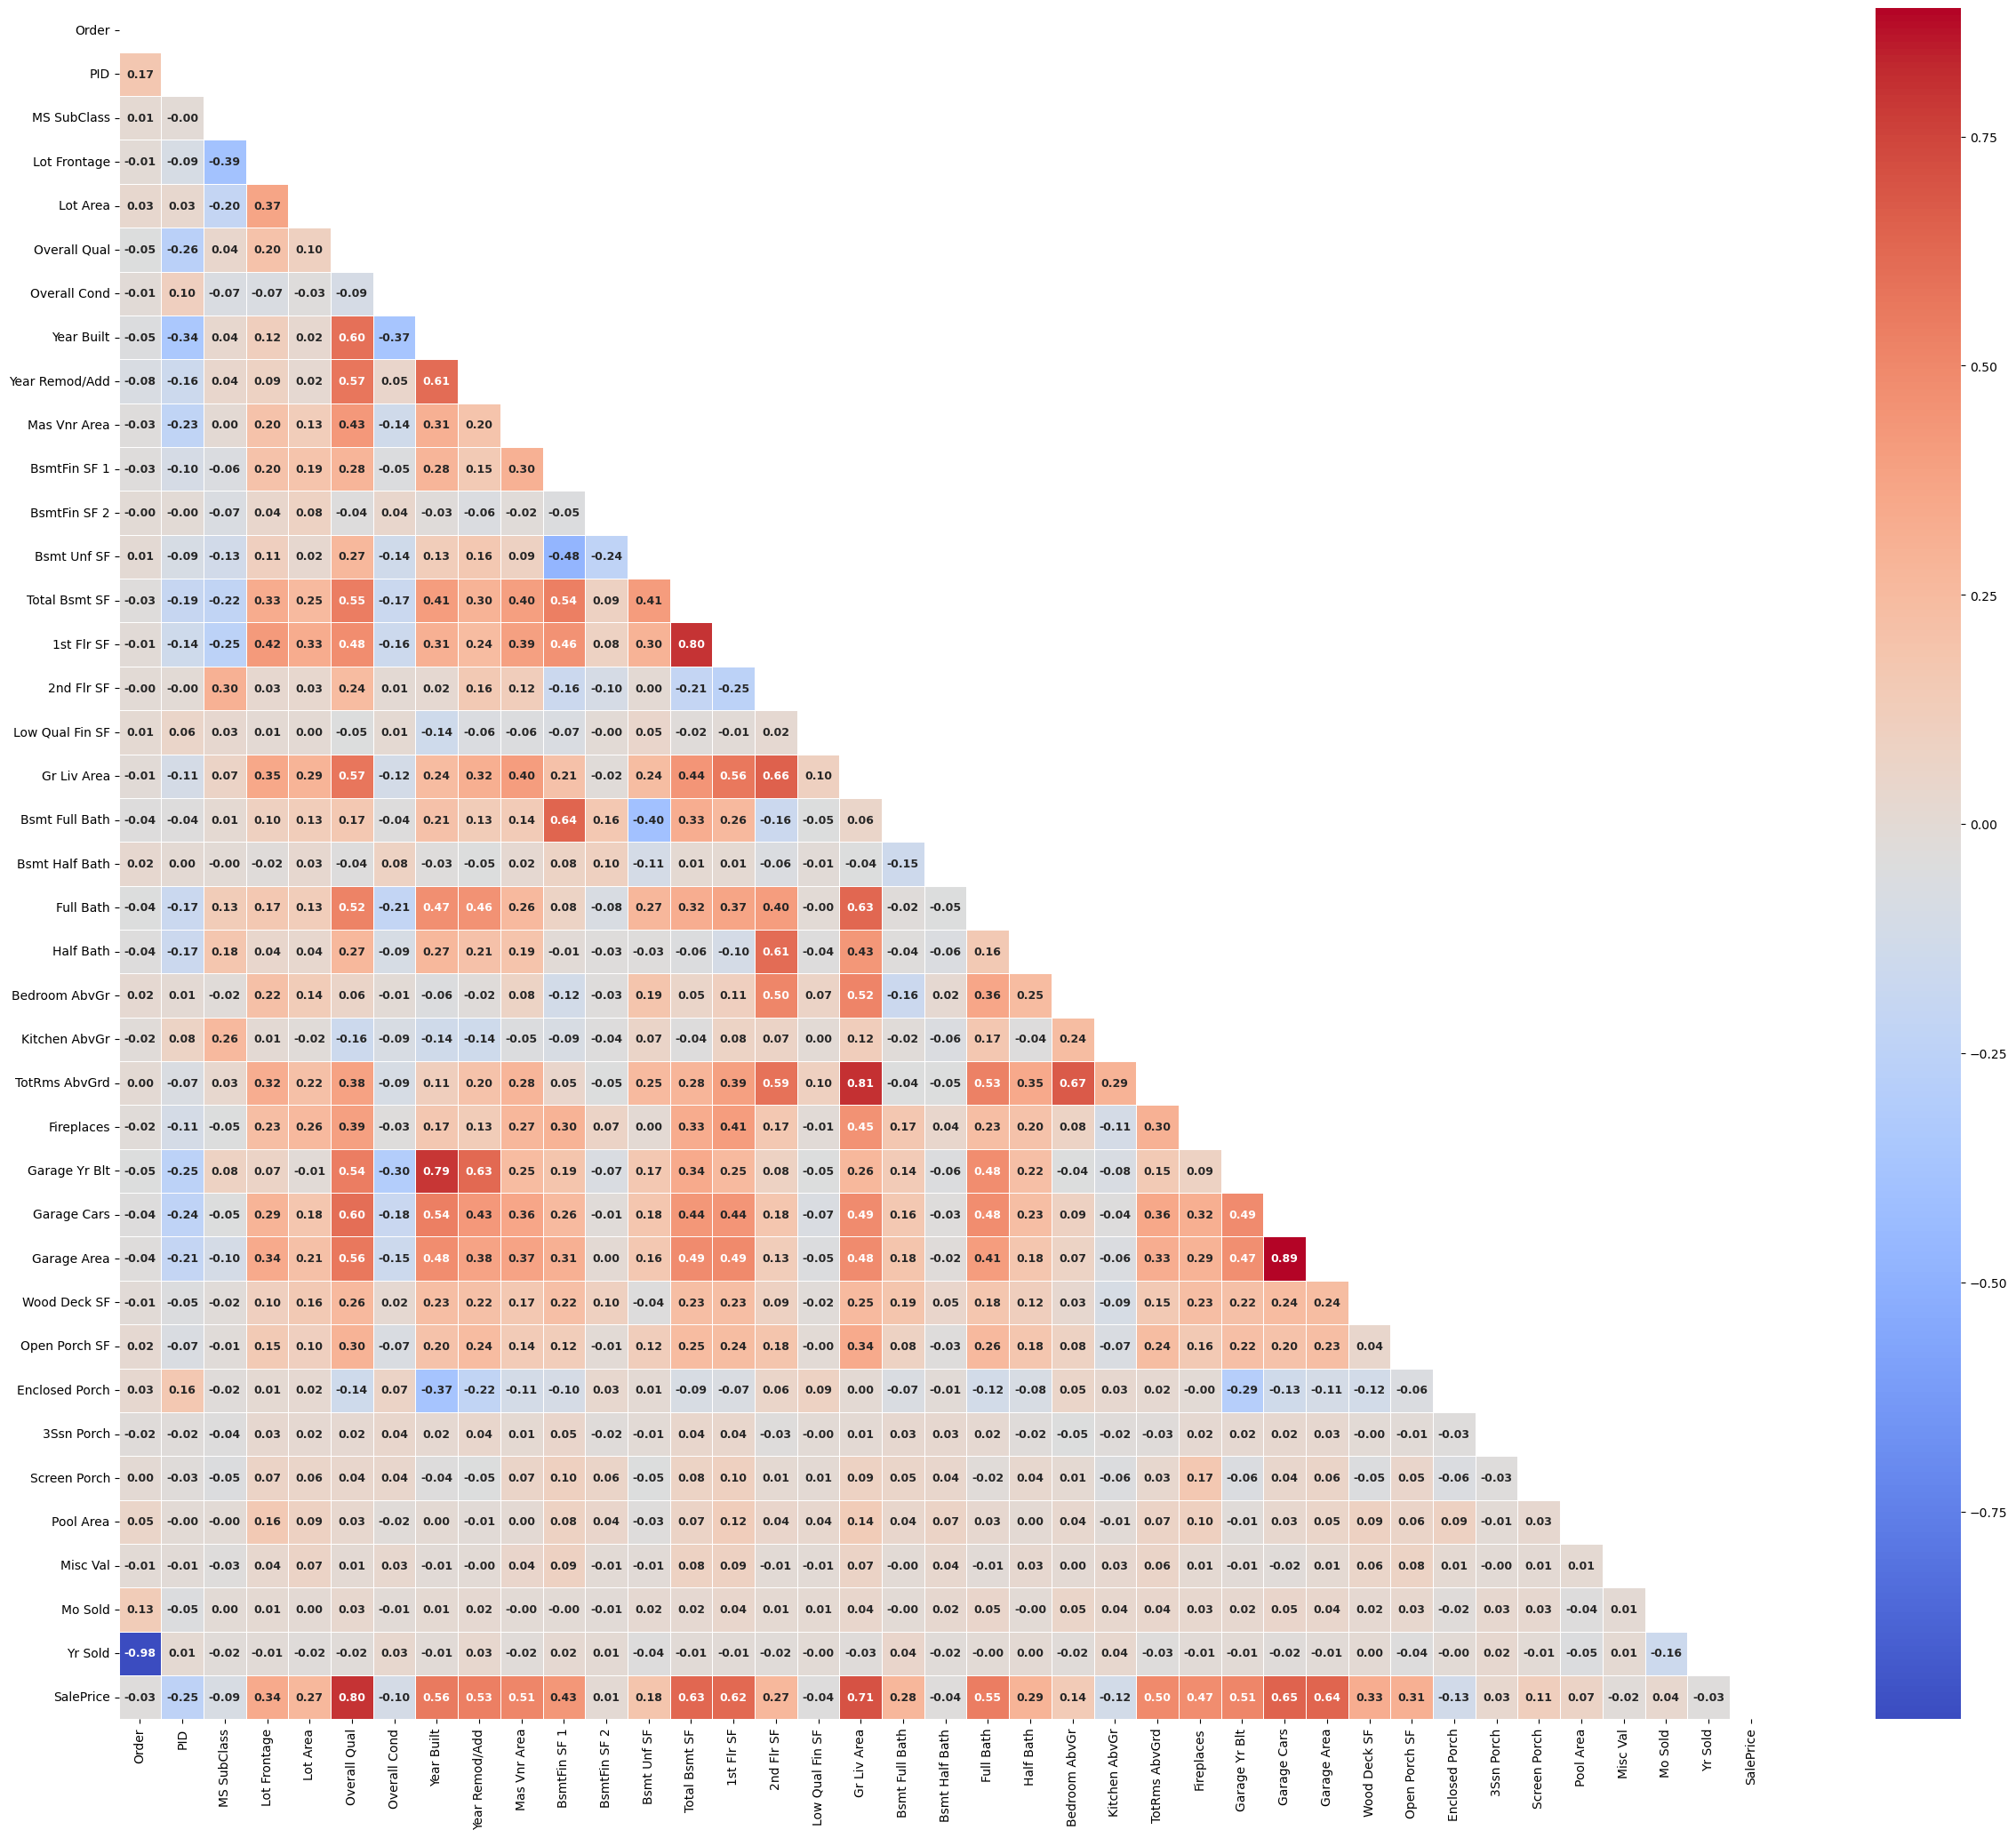

In [24]:

# Compute the correlation matrix for the encoded DataFrame
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True  # Mask the upper triangle

# Set the figure size (width, height)
plt.figure(figsize=(30, 25))  # Adjust the size as needed

# Plot the heatmap with bold annotations and an improved colormap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    annot_kws={"size": 9, "weight": "bold"},  # Bold text for annotations
    cmap='coolwarm',  # Improved colormap
    mask=mask, 
    linewidths=0.5,  # Add gridlines for clarity
    linecolor='white'  # Gridline color
)

# Save the heatmap
plt.savefig('Improved Pyramid Heatmap.png')

# Show the plot
plt.show()



#### Based on the resulting heatmap and correlation coefficient values, `Overall Quality (Overall Qual)` and `Ground Living Area (Gr Liv Area)` exhibit a strong correlation with `SalePrice`. Specifically, `Overall Qual`shows a correlation of `0.8`, while `Gr Liv Area` has a correlation of `0.71`. These high correlation values indicate that both features have a significant impact on the sale price of a property.


## Step 7: Advanced Visualizations (Optional)

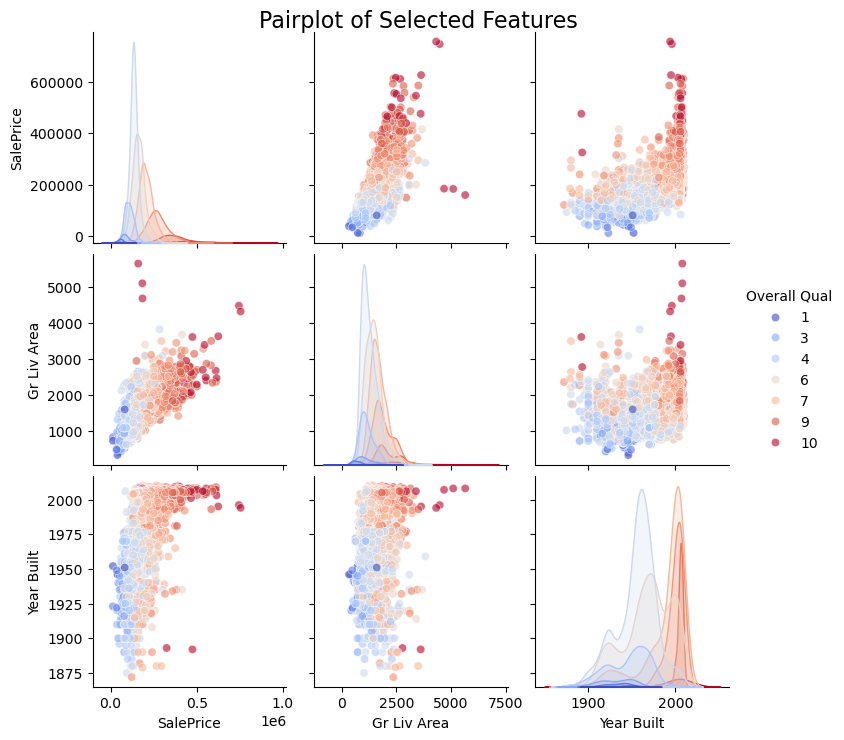

In [26]:

# Selecting relevant features
selected_features = df[['SalePrice', 'Gr Liv Area', 'Year Built', 'Overall Qual']]

# Create a pairplot with customized aesthetics
sns.pairplot(selected_features, 
             diag_kind='kde',  # Kernel density estimate (KDE) on the diagonal for smooth distribution
             plot_kws={'alpha': 0.6},  # Adjust transparency of scatter plots
             diag_kws={'color': 'blue'},  # Set color of the diagonal plots
             hue='Overall Qual',  # Optionally, color points by 'Overall Qual' for better understanding
             palette='coolwarm')  # Color palette for the hue variable

# Set plot labels for clarity
plt.suptitle('Pairplot of Selected Features', size=16)
plt.subplots_adjust(top=0.95)  # Adjust title position to avoid overlap with the plots
plt.savefig('Pair Plot.png')
# Show the plot
plt.show()


### Overview:
This pairplot visualizes the pairwise relationships between four selected features: `SalePrice`, `Gr Liv Area`, `Year Built`, and `Overall Qual`.

### Key Observations:

#### Diagonal Histograms:
Along the diagonal, we see the distribution of each individual feature.

- `SalePrice`: The distribution is right-skewed, indicating that most houses have lower sale prices, with a few outliers at the higher end.
- `Gr Liv Area`: This distribution is also right-skewed, suggesting that most houses have smaller living areas.
- `Year Built`: The distribution shows a peak around the mid-20th century, indicating that a significant portion of the houses were built during that period.
- `Overall Qual`: This feature is categorical, representing the overall quality of the house. The distribution shows that most houses fall into the middle quality range (scores 5-7).

#### Scatter Plots:
The off-diagonal plots show the pairwise relationships between the features.

- `SalePrice` vs. `Gr Liv Area`: There's a clear positive correlation. As the living area increases, the sale price tends to increase as well. This makes sense as larger houses are generally more expensive.
- `SalePrice` vs. `Year Built`: The relationship is less clear-cut. There might be a slight positive trend, suggesting that newer houses tend to have higher sale prices, but there's also a lot of variability.
- `SalePrice` vs. `Overall Qual`: A strong positive correlation is evident. Houses with higher overall quality ratings tend to have higher sale prices.
- `Gr Liv Area` vs. `Year Built`: There's a slight positive trend, indicating that newer houses tend to have larger living areas.
- `Gr Liv Area` vs. `Overall Qual`: A positive correlation is visible. Houses with higher overall quality tend to have larger living areas.
- `Year Built` vs. `Overall Qual`: There's a slight positive trend, suggesting that newer houses tend to have higher overall quality ratings.

#### Color Coding:
The points in the scatter plots are color-coded based on the `Overall Qual` feature. This helps visualize how the overall quality of a house might influence its relationship with other features.

### Possible Implications:

- **Gr Liv Area and SalePrice**: The strong positive correlation between `Gr Liv Area` and `SalePrice` suggests that living area is a significant factor in determining a house's value.
- **Overall Qual and SalePrice**: The strong positive correlation between `Overall Qual` and `SalePrice` indicates that the overall quality of a house has a major impact on its sale price.
- **Year Built**: While there are some trends, the relationship between `Year Built` and other features is less clear-cut, suggesting that other factors might play a more significant role.


## Step 8: Insights and Summary

In [ ]:
# Changing numerical columns as a list
numeric_df.columns.tolist()

In [ ]:
from scipy.stats import pearsonr

# Define the target column
target_column = 'SalePrice'

# Create a dictionary to store the results
correlation_results = {}

# Iterate through all numeric columns except the target column
for column in numeric_df.columns:
    if column != target_column:
        # Calculate the Pearson correlation and P-value
        pearson_coef, p_value = pearsonr(numeric_df[column], numeric_df[target_column])
        
        # Store the results in the dictionary
        correlation_results[column] = {'Pearson Coefficient': pearson_coef, 'P-value': p_value}

# Convert the results to a DataFrame for better visualization 
import pandas as pd
correlation_df = pd.DataFrame(correlation_results).T ## transporting the Data Frame

# Display the sorted results by the absolute value of Pearson Coefficient
correlation_df = correlation_df.sort_values(by='Pearson Coefficient', key=abs, ascending=False)
print(correlation_df)


---

# Observations

## Strong Positive Correlations
- `Overall Qual` (0.799, P < 0.05):  
  Indicates a strong positive correlation. Higher quality houses tend to have higher `SalePrice`.
- `Gr Liv Area` (0.707, P < 0.05):  
  Suggests larger living areas are strongly associated with higher `SalePrice`.
- `Garage Cars` (0.648, P < 0.05):  
  More garage space (in terms of cars) correlates with higher `SalePrice`.
- `Garage Area` (0.640, P < 0.05):  
  Larger garage areas also strongly predict higher `SalePrice`.

## Moderate Positive Correlations
- `Total Bsmt SF`, `1st Flr SF`, `Year Built`:  
  These features show moderate positive correlations, indicating they have a meaningful but weaker influence on `SalePrice` compared to the strongest features.
- `Full Bath` (0.546, P < 0.05):  
  Houses with more full bathrooms tend to have higher `SalePrice`.

## Weak Positive Correlations
- `Open Porch SF`, `Wood Deck SF`, `Lot Frontage`:  
  These features have a weaker correlation with `SalePrice`. They might contribute to price but are less significant predictors.

## Weak Negative Correlations
- `Overall Cond` (-0.102, P < 0.05):  
  Slight negative correlation, indicating that houses in better condition might not necessarily fetch a higher `SalePrice` (perhaps overshadowed by other factors).
- `Kitchen AbvGr` (-0.120, P < 0.05):  
  Suggests that more kitchens above ground correlate weakly negatively with `SalePrice`, possibly due to redundancy.

## No Significant Correlation (High P-values)
 Features like `Misc Val`, `BsmtFin SF 2`, and `Yr Sold` have near-zero correlation coefficients with high P-values. This indicates no significant relationship with `SalePrice`.

## Key Takeaways
### Top Predictors of `SalePrice`
- `Overall Qual`
- `Gr Liv Area`
- `Garage Cars` and `Garage Area`
- `Total Bsmt SF`

### Features with Minimal or No Influence
- `Misc Val`, `BsmtFin SF 2`, and `Yr Sold` show negligible correlation.

## Overall Impact
- **Structural features** like `Gr Liv Area`, `Overall Qual`, and garages are the most influential predictors of `SalePrice`.
- **Temporal features** like `Year Built` and `Year Remod/Add` have a moderate impact but are less significant than structural aspects.

---


## In Step 5, we explored how different `Neighborhoods` and `House Styles` influence `SalePrice`. In this final section, we will expand our analysis to examine the impact of additional categorical variables, with a particular focus on `Nominal variables`, on `SalePrice`.


In [ ]:
## Checking categorical columns
categorical_columns = df.select_dtypes(include = ['object']).columns
print(categorical_columns)

In [ ]:
categorical_df = df[categorical_columns]
categorical_df

In [ ]:
## Exploring which types of variables are included in desired columns
df['Garage Type'].unique()

In [ ]:
## Creating nominal columns to analyze
desired_nomi_cols = df[['MS Zoning','Lot Shape','Land Contour','Lot Config','Bldg Type',
                        'Foundation','Garage Type','Misc Feature']].columns
desired_nomi_cols

In [ ]:
# Defining the number of rows and columns
num_cols = 2  # Set to 2 columns
num_rows = (len(desired_nomi_cols) + 1) // num_cols  # Calculate rows required

# Creating subplots with 2 rows and adjusted columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20), sharey=False)

# Flatten the axes array in case there are multiple rows
axes = axes.flatten()

# Looping through each column and create the boxplot
for i, col in enumerate(desired_nomi_cols):
    # Calculate the median SalePrice for each category in the nominal variable
    median_values = df.groupby(col, observed=True)['SalePrice'].median().sort_values(ascending=False)
    
    # Set the categories order based on median SalePrice (highest to lowest)
    ordered_categories = median_values.index

    # Use sns.boxplot to create a boxplot of the nominal variable vs SalePrice with ordered categories
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[i], order=ordered_categories,patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='skyblue'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o'))

    # Set the title for each subplot
    axes[i].set_title(f'{col} vs SalePrice')

    # Rotate the x-axis labels for better visibility if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save as png
plt.savefig('Multiple boxplots of nominal data across SalePrice')

# Show the plot
plt.show()


# Observations

When examining the box plot of `MS Zoning` vs `SalePrice` in the top-left corner, we observe that the `FV` category (likely representing **Floating Village**) has the highest median `SalePrice`, exceeding $200,000. All other categories show median values below $200,000.

Moving on to the `Lot Shape` vs `SalePrice` box plot, we can see that properties with an **irregular** lot shape (`IR1`, `IR2`, `IR3`) exhibit a higher median `SalePrice` compared to those with a **regular** lot shape (`Reg`).

In the `Land Contour` vs `SalePrice` box plot, properties built on **hills** (`HLS`) have the highest median `SalePrice` when compared to other land contours, such as **Level** (`Lvl`) and **Bank** (`Bnk`).

Both `Bldg Type` and `Foundation` show an impact on `SalePrice`. The box plot for `Bldg Type` reveals that **Townhouse End Unit** (`TwnhsE`) and **Single Family** (`1Fam`) share the highest median `SalePrice`, indicating that these types of properties tend to have higher values. Similarly, in the `Foundation` vs `SalePrice` box plot, homes with a **Poured Concrete** (`PConc`) foundation show the highest median `SalePrice`.

Lastly, the `Garage Type` vs `SalePrice` box plot highlights that homes with a **Built-In** (`BuiltIn`) garage have the highest median `SalePrice` compared to other garage types.
